In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Splitting
from sklearn.model_selection import train_test_split

#Imputing Missing Values
from sklearn.impute import SimpleImputer

#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder as onehot

#Scaling Numeric Data
from sklearn.preprocessing import StandardScaler

#Label Encoder
from sklearn.preprocessing import LabelEncoder

#Column Transformer
from sklearn.compose import ColumnTransformer

#PipeLine
from sklearn.pipeline import Pipeline

#Estimator
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Plotting the Pipeline
from sklearn import set_config

#Visualisation
import seaborn as sns

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Grid Search
from sklearn.model_selection import GridSearchCV

#Warning Handling
import warnings
warnings.filterwarnings("ignore")

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Measuring Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Matplotlib
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
train_df = pd.read_csv("/Users/prakhar/Desktop/BDDA Assignment/DataSets/Train.csv")
test_df = pd.read_csv("/Users/prakhar/Desktop/BDDA Assignment/DataSets/Test.csv")
data=pd.read_csv("/Users/prakhar/Desktop/BDDA Assignment/DataSets/Train.csv")

# Data Exploration

In [4]:
train_df.shape

(1693050, 23)

In [5]:
test_df.shape

(241817, 23)

In [6]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2079834,23,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
1,2079835,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
2,2079836,6,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
3,2079837,87,NaN,0,0,0,0,0,0,3,5,0,No,0,-99.0,-99.0,0,No,No,No,Yes,No,No
4,2080337,315,NaN,0,0,0,0,0,1,3,11,1,No,0,-99.0,-99.0,0,Yes,No,No,No,No,No


In [7]:
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,4987435,39,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.00,0,Yes,No,No,Yes,No,No
1,4992835,93,8.0,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.00,0,No,No,No,Yes,No,No
2,4995578,0,15.0,0,0,0,0,0,0,0,0,0,No,0,0.8,0.77,0,No,No,No,Yes,No,No
3,5003558,4,NaN,0,0,0,0,0,0,1,1,0,No,0,-99.0,-99.00,0,Yes,No,No,Yes,No,No
4,5014185,61,2.0,0,0,0,0,0,0,0,0,1,No,0,-99.0,-99.00,0,No,No,No,Yes,No,No


In [8]:
train_df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.693050e+06,1.693050e+06,1.591716e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06
mean,3.442463e+06,4.940574e+02,7.908687e+00,4.031745e+01,1.816772e+02,3.431218e+02,5.018450e+02,5.365595e+01,1.735685e+02,3.407958e+02,5.120291e+02,5.237118e+01,1.737455e+00,-6.891604e+00,-6.437676e+00,6.507197e-01
std,7.751593e+05,2.922938e+04,7.040469e+00,1.066337e+03,5.458868e+03,9.703406e+03,1.382572e+04,1.689275e+03,5.151446e+03,9.399142e+03,1.399001e+04,1.281744e+03,2.615318e+02,2.657089e+01,2.583929e+01,4.215168e+01
min,2.063622e+06,-3.342300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,2.983511e+06,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e-01,6.600000e-01,0.000000e+00
50%,3.406774e+06,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,3.830036e+06,8.100000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.400000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,4.986465e+06,1.228510e+07,5.200000e+01,4.894080e+05,1.511160e+06,2.218752e+06,3.229292e+06,7.417620e+05,1.192407e+06,2.133557e+06,3.205172e+06,3.664620e+05,1.623320e+05,1.000000e+00,1.000000e+00,1.500000e+04


In [9]:
test_df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.418170e+05,2.418170e+05,227490.000000,241817.000000,2.418170e+05,2.418170e+05,2.418170e+05,241817.000000,2.418170e+05,2.418170e+05,2.418170e+05,241817.000000,241817.000000,241817.000000,241817.000000,241817.000000
mean,5.107374e+06,4.726262e+02,7.919060,43.457627,1.712046e+02,3.284895e+02,4.817003e+02,52.600599,1.693603e+02,3.384492e+02,4.988638e+02,50.779771,1.293677,-6.893688,-6.458891,0.926205
std,6.980670e+04,2.858710e+04,7.038657,1277.069025,4.882851e+03,9.037074e+03,1.314819e+04,1431.280892,5.001938e+03,9.333977e+03,1.342589e+04,1233.437032,87.394107,26.567962,25.877414,66.616829
min,4.986466e+06,-3.558300e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,5.046920e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.650000,0.000000
50%,5.107374e+06,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.800000,0.800000,0.000000
75%,5.167828e+06,8.100000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,5.000000,1.400000e+01,3.000000e+01,4.700000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,5.228282e+06,1.208618e+07,52.000000,396192.000000,1.037188e+06,2.029784e+06,3.110528e+06,329198.000000,1.099651e+06,2.115141e+06,3.148554e+06,305163.000000,30584.000000,1.000000,1.000000,16804.000000


In [10]:
train_df.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [11]:
test_df.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [12]:
train_df.nunique()

sku                  1693050
national_inv           14959
lead_time                 33
in_transit_qty          5192
forecast_3_month        7762
forecast_6_month       11028
forecast_9_month       13595
sales_1_month           5735
sales_3_month          10476
sales_6_month          14924
sales_9_month          18345
min_bank                5504
potential_issue            2
pieces_past_due          697
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             610
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [13]:
test_df.nunique()

sku                  241817
national_inv           6488
lead_time                33
in_transit_qty         2063
forecast_3_month       3119
forecast_6_month       4378
forecast_9_month       5316
sales_1_month          2238
sales_3_month          4016
sales_6_month          5792
sales_9_month          6970
min_bank               2185
potential_issue           2
pieces_past_due         290
perf_6_month_avg        102
perf_12_month_avg       102
local_bo_qty            274
deck_risk                 2
oe_constraint             2
ppap_risk                 2
stop_auto_buy             2
rev_stop                  2
went_on_backorder         2
dtype: int64

In [14]:
test_target_df = test_df["went_on_backorder"]

In [15]:
test_df.drop(["went_on_backorder"], axis='columns', inplace=True)

In [16]:
test_target_df = pd.DataFrame(test_target_df)

In [17]:
test_target_df

,went_on_backorder
0,No
1,No
2,No
3,No
4,No
...,...
241812,No
241813,No
241814,No
241815,No


In [18]:
test_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,4987435,39,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No
1,4992835,93,8.0,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No
2,4995578,0,15.0,0,0,0,0,0,0,0,0,0,No,0,0.80,0.77,0,No,No,No,Yes,No
3,5003558,4,NaN,0,0,0,0,0,0,1,1,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No
4,5014185,61,2.0,0,0,0,0,0,0,0,0,1,No,0,-99.00,-99.00,0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241812,5228278,8,12.0,0,0,0,0,0,2,2,2,1,No,0,0.46,0.48,0,Yes,No,No,Yes,No
241813,5228279,505,12.0,0,0,0,0,1,1,2,2,1,No,0,0.46,0.48,0,Yes,No,No,Yes,No
241814,5228280,11,12.0,0,2,2,2,0,0,0,0,1,No,0,0.46,0.48,0,Yes,No,Yes,Yes,No
241815,5228281,11,12.0,0,0,2,2,0,0,0,0,1,No,0,0.46,0.48,0,Yes,No,No,Yes,No


# VISUALISATION

In [19]:
data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2079834,23,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
1,2079835,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
2,2079836,6,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,2079837,87,NaN,0,0,0,0,0,0,3,5,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
4,2080337,315,NaN,0,0,0,0,0,1,3,11,1,No,0,-99.00,-99.00,0,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693045,4780991,-1,8.0,6,6,6,12,5,10,13,15,0,No,0,0.99,0.99,1,No,No,No,Yes,No,No
1693046,4753454,3288,8.0,1881,3520,7840,13280,1532,6179,10886,15398,3079,No,0,0.91,0.96,8,No,No,No,Yes,No,No
1693047,4969190,-13,8.0,0,75,100,150,69,96,118,168,1,No,0,0.31,0.31,15,No,No,Yes,Yes,No,No
1693048,4888353,3463,12.0,144,0,0,0,202,334,591,875,152,No,0,0.81,0.74,4,No,No,Yes,Yes,No,No


Plotting correlation matrix 

<AxesSubplot:>

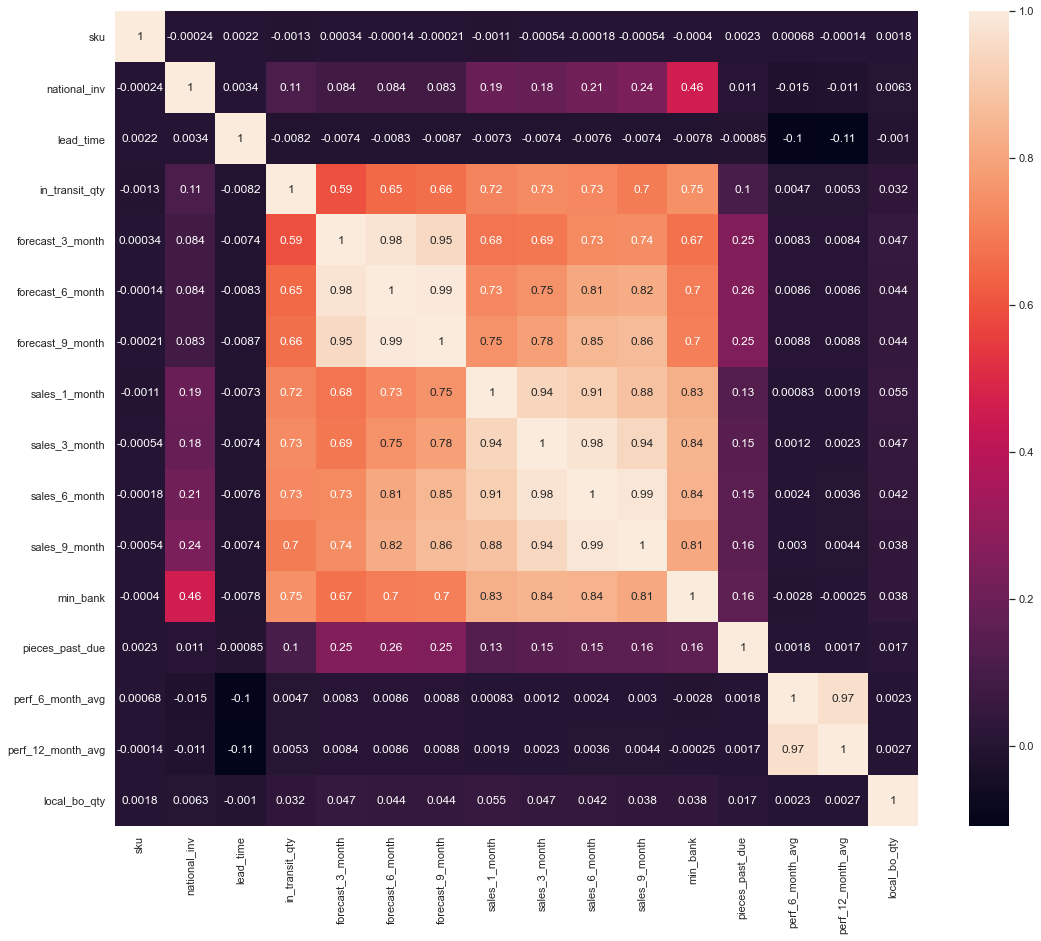

In [20]:
cor = data.corr()
sns.set(rc={'figure.figsize':(18,15)})
# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot = True)

<AxesSubplot:xlabel='forecast_3_month', ylabel='sales_3_month'>

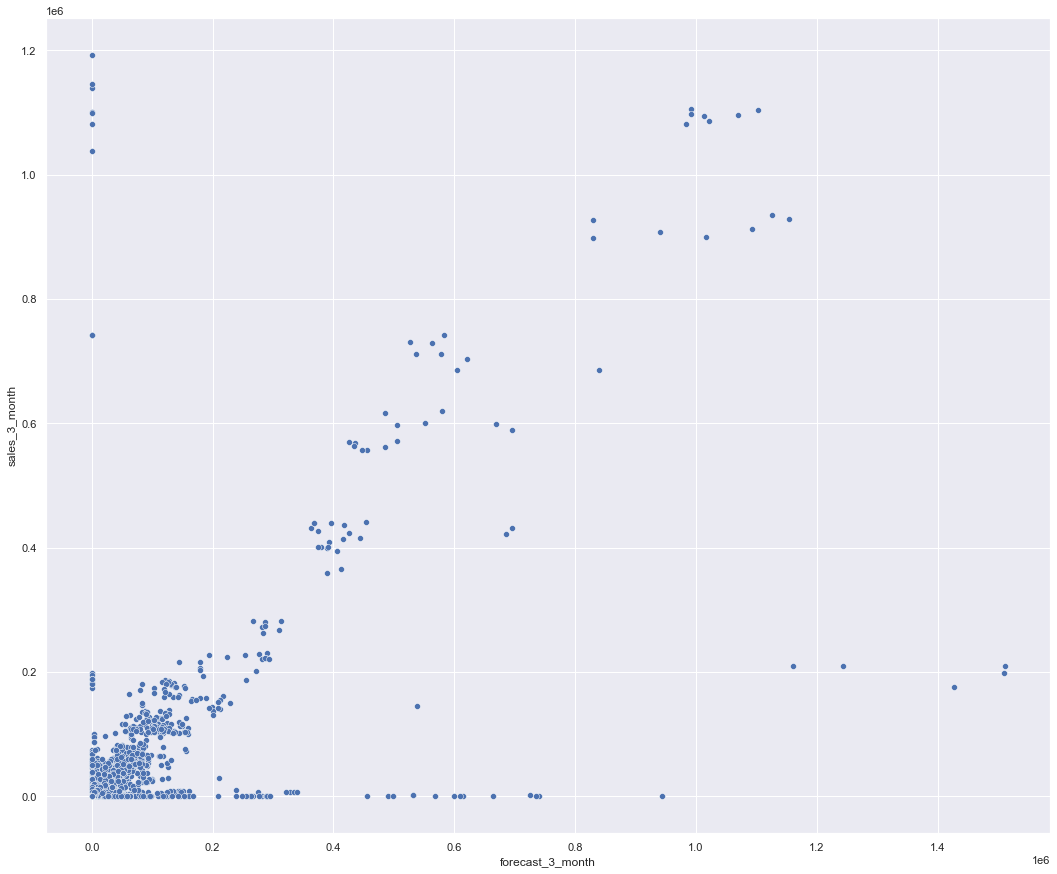

In [21]:
sns.scatterplot(data=data, x="forecast_3_month", y="sales_3_month")

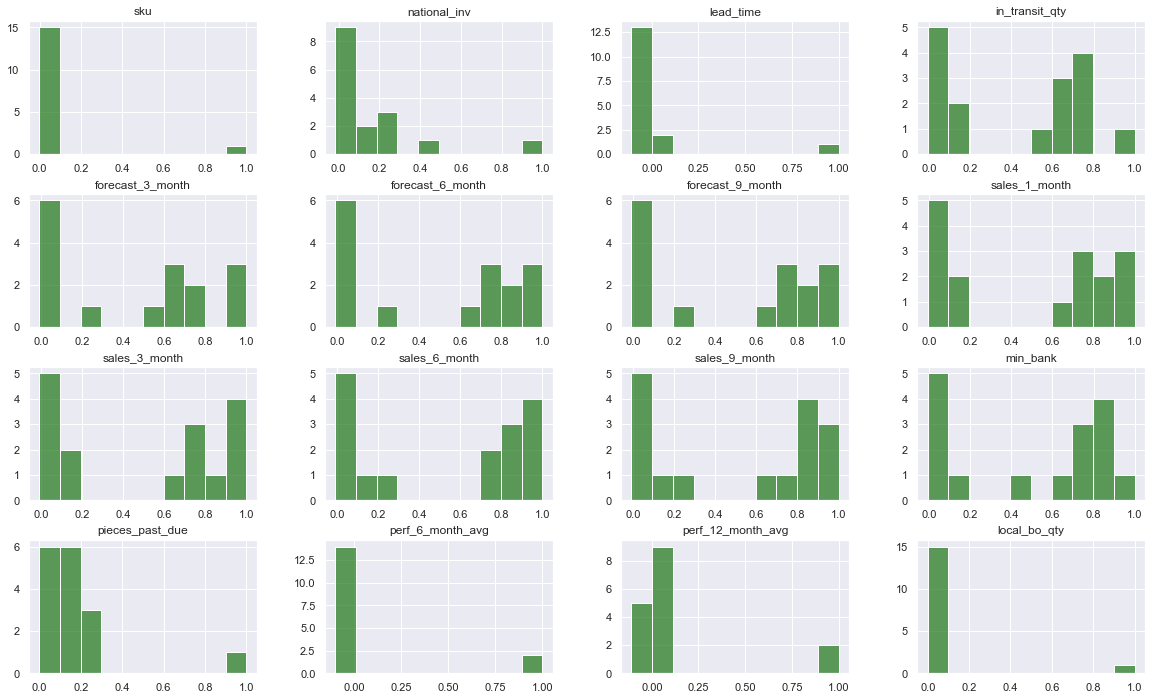

In [22]:
cor.hist(figsize=(20,12), color="#107009AA")
plt.show()

<Figure size 648x576 with 0 Axes>

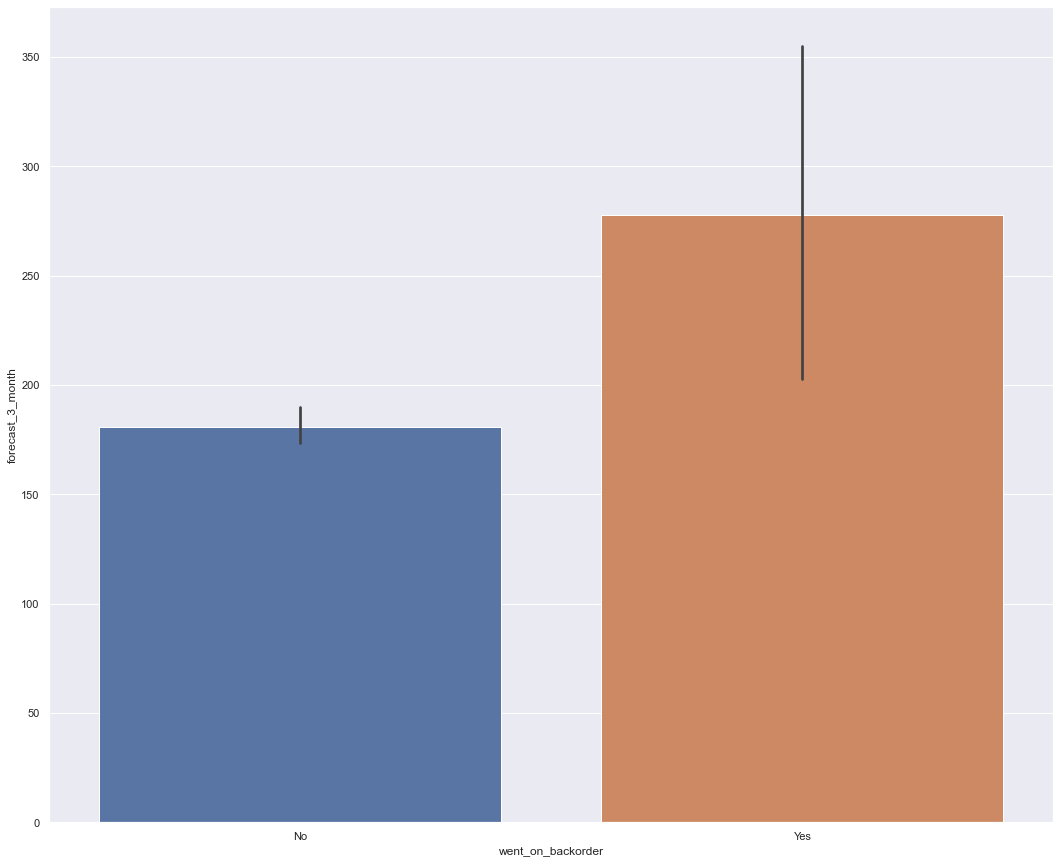

<Figure size 648x576 with 0 Axes>

In [27]:
ax = sns.barplot(x="went_on_backorder", y="forecast_3_month", data=data)
plt.figure(figsize=(9, 8))

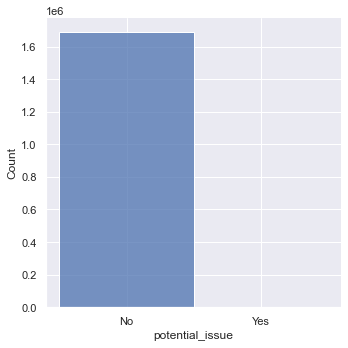

In [28]:
sns.displot(data, x="potential_issue")

<Figure size 648x576 with 0 Axes>

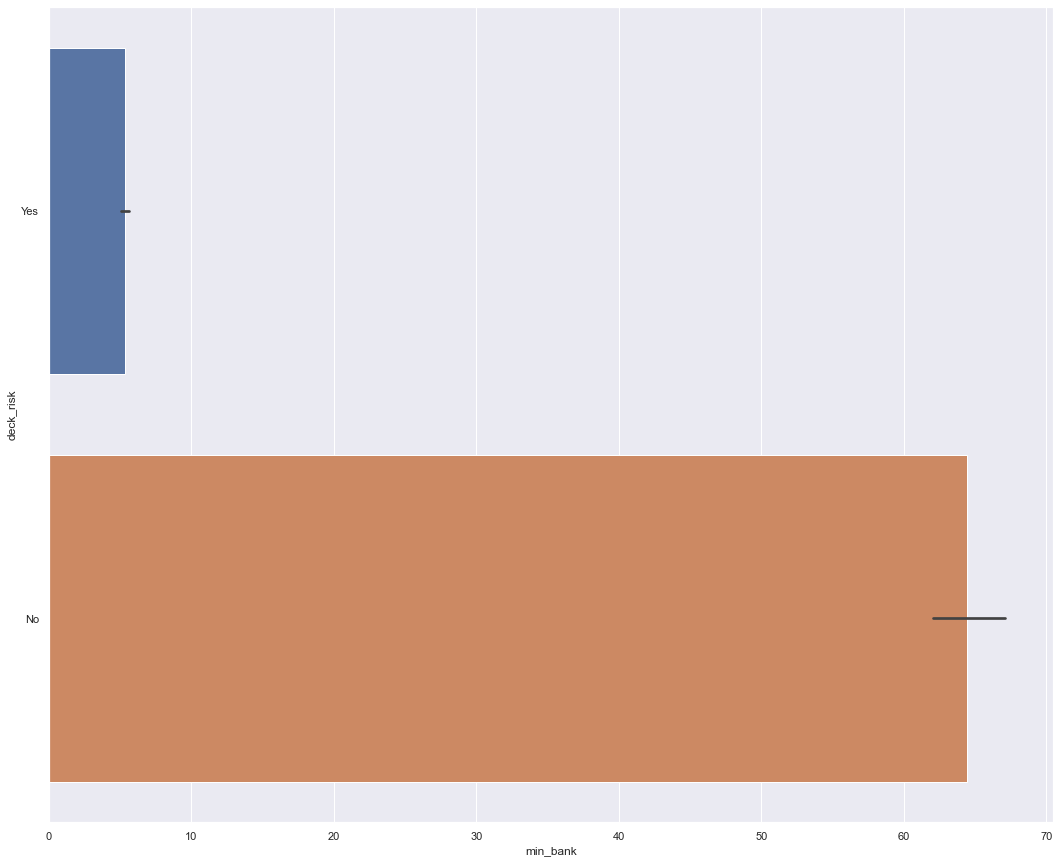

<Figure size 648x576 with 0 Axes>

In [29]:
ax = sns.barplot(x="min_bank", y="deck_risk", data=data)
plt.figure(figsize=(9, 8))

# Pre-Processing

In [19]:
train_df.isnull().sum()

# Lead Time has 101334 Missing Values

sku                       0
national_inv              0
lead_time            101334
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [20]:
test_df.isnull().sum()

# Lead Time has 14327 Missing Values

sku                      0
national_inv             0
lead_time            14327
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
dtype: int64

In [21]:
train_df.isnull().sum()/len(train_df.index)*100

sku                  0.000000
national_inv         0.000000
lead_time            5.985293
in_transit_qty       0.000000
forecast_3_month     0.000000
forecast_6_month     0.000000
forecast_9_month     0.000000
sales_1_month        0.000000
sales_3_month        0.000000
sales_6_month        0.000000
sales_9_month        0.000000
min_bank             0.000000
potential_issue      0.000000
pieces_past_due      0.000000
perf_6_month_avg     0.000000
perf_12_month_avg    0.000000
local_bo_qty         0.000000
deck_risk            0.000000
oe_constraint        0.000000
ppap_risk            0.000000
stop_auto_buy        0.000000
rev_stop             0.000000
went_on_backorder    0.000000
dtype: float64

In [22]:
test_df.isnull().sum()/len(test_df.index)*100

sku                  0.000000
national_inv         0.000000
lead_time            5.924728
in_transit_qty       0.000000
forecast_3_month     0.000000
forecast_6_month     0.000000
forecast_9_month     0.000000
sales_1_month        0.000000
sales_3_month        0.000000
sales_6_month        0.000000
sales_9_month        0.000000
min_bank             0.000000
potential_issue      0.000000
pieces_past_due      0.000000
perf_6_month_avg     0.000000
perf_12_month_avg    0.000000
local_bo_qty         0.000000
deck_risk            0.000000
oe_constraint        0.000000
ppap_risk            0.000000
stop_auto_buy        0.000000
rev_stop             0.000000
dtype: float64

#Since Missing Values in Traning and Test Set are both 5.9% < 50-60% we will need to replace.

In [23]:
#Label Encoding for Target Variable

x=train_df['went_on_backorder']
le = LabelEncoder()
le.fit(x)

train_df['went_on_backorder'] = le.fit_transform(x)

In [24]:
train_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2079834,23,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,0
1,2079835,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,0
2,2079836,6,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,0
3,2079837,87,NaN,0,0,0,0,0,0,3,5,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,0
4,2080337,315,NaN,0,0,0,0,0,1,3,11,1,No,0,-99.00,-99.00,0,Yes,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693045,4780991,-1,8.0,6,6,6,12,5,10,13,15,0,No,0,0.99,0.99,1,No,No,No,Yes,No,0
1693046,4753454,3288,8.0,1881,3520,7840,13280,1532,6179,10886,15398,3079,No,0,0.91,0.96,8,No,No,No,Yes,No,0
1693047,4969190,-13,8.0,0,75,100,150,69,96,118,168,1,No,0,0.31,0.31,15,No,No,Yes,Yes,No,0
1693048,4888353,3463,12.0,144,0,0,0,202,334,591,875,152,No,0,0.81,0.74,4,No,No,Yes,Yes,No,0


In [25]:
#Imputing Lead Time in Train & Test Data Set

#si_mean   = SimpleImputer(strategy = 'mean')

#train_df['lead_time'] = si_mean.fit_transform(train_df['lead_time'])


#test_df['lead_time'] = si_mean.fit_transform(test_df['lead_time'])

In [26]:
# Replacing NaN Values in Lead Time with Mean

values = {'lead_time': np.mean(train_df['lead_time'])}
values1 = {'lead_time': np.mean(test_df['lead_time'])}

In [27]:
train_df = train_df.fillna(value=values)
test_df = test_df.fillna(value=values1)

In [28]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2079834,23,7.908687,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,0
1,2079835,2,7.908687,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,0
2,2079836,6,7.908687,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,0
3,2079837,87,7.908687,0,0,0,0,0,0,3,5,0,No,0,-99.0,-99.0,0,No,No,No,Yes,No,0
4,2080337,315,7.908687,0,0,0,0,0,1,3,11,1,No,0,-99.0,-99.0,0,Yes,No,No,No,No,0


In [29]:
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,4987435,39,7.91906,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.00,0,Yes,No,No,Yes,No
1,4992835,93,8.00000,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.00,0,No,No,No,Yes,No
2,4995578,0,15.00000,0,0,0,0,0,0,0,0,0,No,0,0.8,0.77,0,No,No,No,Yes,No
3,5003558,4,7.91906,0,0,0,0,0,0,1,1,0,No,0,-99.0,-99.00,0,Yes,No,No,Yes,No
4,5014185,61,2.00000,0,0,0,0,0,0,0,0,1,No,0,-99.0,-99.00,0,No,No,No,Yes,No


# Feature Engineering

In [30]:
#Drop SKU column
train_df = train_df.drop('sku', axis = 1)
test_df = test_df.drop('sku', axis = 1)

In [31]:
train_df.shape

(1693050, 22)

In [32]:
test_df.shape

(241817, 21)

In [33]:
#to obtain all numeric columns in train data set
numeric_train = [col for col in train_df.columns[:] if train_df[col].dtypes!='object']
print('numeric columns are:',numeric_train)
#to obtain all categorical columns in train data set
categorical_train = [col for col in train_df.columns if train_df[col].dtypes=='object']
print('categorical columns are:',categorical_train)

numeric columns are: ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'went_on_backorder']
categorical columns are: ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [34]:
#to obtain all numeric columns in test data set
numeric_test = [col for col in test_df.columns[:] if test_df[col].dtypes!='object']
print('numeric columns are:',numeric_test)
#to obtain all categorical columns in test data set
categorical_test = [col for col in test_df.columns if test_df[col].dtypes=='object']
print('categorical columns are:',categorical_test)

numeric columns are: ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
categorical columns are: ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [35]:
#Standard Scaler Training - Making Sure to Avoid Target Variable

ss = StandardScaler()
ntrain=ss.fit_transform(train_df[numeric_train[:-1]])

In [36]:
# Standard Scaler Test

ss = StandardScaler()
ntest=ss.fit_transform(test_df[numeric_test])

In [37]:
ntrain=pd.DataFrame(ntrain,columns=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty'])

In [38]:
ntrain

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.016116,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
1,-0.016834,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
2,-0.016697,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
3,-0.013926,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.035939,-0.036242,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
4,-0.006126,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033499,-0.035939,-0.035813,-0.040079,-0.006643,-3.466517,-3.582233,-0.015438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693045,-0.016937,1.337627e-02,-0.032183,-0.032182,-0.034743,-0.035430,-0.028803,-0.031752,-0.034875,-0.035527,-0.040859,-0.006643,0.296626,0.287457,0.008286
1693046,0.095587,1.337627e-02,1.726174,0.611541,0.772603,0.924231,0.875135,1.165776,1.121933,1.064044,2.361338,-0.006643,0.293615,0.286296,0.174353
1693047,-0.017348,1.337627e-02,-0.037809,-0.019542,-0.025055,-0.025449,0.009083,-0.015058,-0.023704,-0.024591,-0.040079,-0.006643,0.271034,0.261140,0.340420
1693048,0.101574,5.993264e-01,0.097232,-0.033281,-0.035361,-0.036298,0.087815,0.031143,0.026620,0.025945,0.077729,-0.006643,0.289851,0.277782,0.079458


In [39]:
ntest=pd.DataFrame(ntest,columns=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty'])

In [40]:
train_df = train_df[train_df.columns[train_df.columns.isin(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop','went_on_backorder'])]]
train_df = pd.concat([train_df,ntrain],axis=1)
test_df = test_df[test_df.columns[test_df.columns.isin(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'])]]
test_df = pd.concat([test_df,ntest],axis=1)
train_df.head(5)

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,No,Yes,No,No,Yes,No,0,-0.016116,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
1,No,Yes,No,No,Yes,No,0,-0.016834,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
2,No,Yes,No,No,Yes,No,0,-0.016697,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
3,No,No,No,No,Yes,No,0,-0.013926,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.035939,-0.036242,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
4,No,Yes,No,No,No,No,0,-0.006126,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033499,-0.035939,-0.035813,-0.040079,-0.006643,-3.466517,-3.582233,-0.015438


In [41]:
from sklearn.preprocessing import LabelEncoder
# Processing the categorical columns to provide vector form of feature
class DataFrameProcess:
    def __init__(self,df,col):
        self.df =df
        self.col=col
    def dataEncoding(self):
        if self.df[self.col].dtype.name == 'object' or self.df[self.col].dtype.name == 'category':
            le = LabelEncoder()
            self.df[self.col] = le.fit_transform(self.df[self.col])    


def data_transform(df):  
    for col in df.columns:
        data_prcs = DataFrameProcess(df,col)
        data_prcs.dataEncoding()  
#data_transform(X_train) 
#data_transform(X_test)

In [42]:
data_transform(train_df)

In [43]:
data_transform(test_df)

In [44]:
data_transform(test_target_df)

In [45]:
train_df.head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0,1,0,0,1,0,0,-0.016116,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
1,0,1,0,0,1,0,0,-0.016834,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
2,0,1,0,0,1,0,0,-0.016697,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.036258,-0.036600,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
3,0,0,0,0,1,0,0,-0.013926,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033693,-0.035939,-0.036242,-0.040859,-0.006643,-3.466517,-3.582233,-0.015438
4,0,1,0,0,0,0,0,-0.006126,1.301071e-16,-0.037809,-0.033281,-0.035361,-0.036298,-0.031763,-0.033499,-0.035939,-0.035813,-0.040079,-0.006643,-3.466517,-3.582233,-0.015438


In [49]:
test_df.head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0,1,0,0,1,0,-0.015169,-2.601978e-16,-0.034029,-0.035063,-0.036349,-0.036636,-0.036751,-0.033859,-0.036260,-0.037157,-0.041169,-0.014803,-3.466826,-3.576142,-0.013903
1,0,0,0,0,1,0,-0.013280,1.185593e-02,-0.034029,-0.035063,-0.036349,-0.036636,-0.036751,-0.033859,-0.036260,-0.037157,-0.041169,-0.014803,-3.466826,-3.576142,-0.013903
2,0,0,0,0,1,0,-0.016533,1.037204e+00,-0.034029,-0.035063,-0.036349,-0.036636,-0.036751,-0.033859,-0.036260,-0.037157,-0.041169,-0.014803,0.289586,0.279352,-0.013903
3,0,1,0,0,1,0,-0.016393,-2.601978e-16,-0.034029,-0.035063,-0.036349,-0.036636,-0.036751,-0.033859,-0.036153,-0.037082,-0.041169,-0.014803,-3.466826,-3.576142,-0.013903
4,0,0,0,0,1,0,-0.014399,-8.670141e-01,-0.034029,-0.035063,-0.036349,-0.036636,-0.036751,-0.033859,-0.036260,-0.037157,-0.040359,-0.014803,-3.466826,-3.576142,-0.013903


# Model Building - Random Forest

In [50]:
data_y = train_df['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

In [52]:
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1,verbose= 10)
parameters = {'n_estimators' : [10,50,100,300,500,1000] , 'max_depth' : [1,3,5,7]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Do

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Do

building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500building tree 5 of 500

building tree 6 of 500
building tree 7 of 500building tree 8 of 500

building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s


building tree 13 of 500building tree 14 of 500

building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s


building tree 21 of 500building tree 22 of 500
building tree 23 of 500

building tree 24 of 500


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s


building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500building tree 43 of 500

building tree 44 of 500
building tree 45 of 500building tree 46 of 500building tree 47 of 500




[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s


building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500building tree 54 of 500

building tree 55 of 500

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.8s



building tree 56 of 500
building tree 57 of 500
building tree 58 of 500building tree 59 of 500building tree 60 of 500


building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.3s


building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500building tree 72 of 500

building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500building tree 78 of 500
building tree 79 of 500

building tree 80 of 500


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   23.8s


building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500building tree 86 of 500
building tree 87 of 500

building tree 88 of 500
building tree 89 of 500


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   29.1s


building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500building tree 94 of 500
building tree 95 of 500
building tree 96 of 500

building tree 97 of 500
building tree 98 of 500
building tree 99 of 500building tree 100 of 500building tree 101 of 500building tree 102 of 500

building tree 103 of 500


building tree 104 of 500
building tree 105 of 500


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   32.4s


building tree 106 of 500
building tree 107 of 500
building tree 108 of 500building tree 109 of 500

building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500building tree 120 of 500building tree 121 of 500




[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.9s


building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500building tree 126 of 500

building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500building tree 136 of 500



[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   43.6s


building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500building tree 144 of 500

building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500building tree 150 of 500
building tree 151 of 500

building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.0s


building tree 157 of 500building tree 158 of 500
building tree 159 of 500building tree 160 of 500


building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500building tree 167 of 500

building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500building tree 172 of 500

building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   57.1s


building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500building tree 183 of 500

building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500building tree 192 of 500
building tree 193 of 500



[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min


building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500building tree 201 of 500

building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500building tree 206 of 500
building tree 207 of 500

building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.2min


building tree 215 of 500building tree 216 of 500

building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500building tree 225 of 500
building tree 226 of 500

building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500building tree 231 of 500building tree 232 of 500building tree 233 of 500


building tree 234 of 500



[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.3min


building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500building tree 242 of 500

building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500building tree 250 of 500building tree 251 of 500


building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500building tree 256 of 500

building tree 257 of 500
building tree 258 of 500
building tree 259 of 500


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  1.4min


building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500building tree 264 of 500
building tree 265 of 500
building tree 266 of 500

building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500building tree 271 of 500building tree 272 of 500

building tree 273 of 500

building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500building tree 280 of 500

building tree 281 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.6min


building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500building tree 297 of 500

building tree 298 of 500building tree 299 of 500

building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500building tree 304 of 500

building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500


[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:  1.7min


building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500building tree 314 of 500

building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500building tree 322 of 500building tree 323 of 500


building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500building tree 330 of 500
building tree 331 of 500building tree 332 of 500


building tree 333 of 500building tree 334 of 500



[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  1.9min


building tree 335 of 500
building tree 336 of 500
building tree 337 of 500building tree 338 of 500
building tree 339 of 500

building tree 340 of 500
building tree 341 of 500building tree 342 of 500

building tree 343 of 500
building tree 344 of 500building tree 345 of 500

building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500building tree 350 of 500

building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500building tree 355 of 500

building tree 356 of 500
building tree 357 of 500
building tree 358 of 500


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min


building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500building tree 363 of 500building tree 364 of 500building tree 365 of 500building tree 366 of 500




building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500building tree 372 of 500

building tree 373 of 500building tree 374 of 500

building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  2.2min


building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500building tree 397 of 500

building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500building tree 403 of 500building tree 404 of 500


building tree 405 of 500
building tree 406 of 500
building tree 407 of 500building tree 408 of 500

building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500


[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  2.3min


building tree 413 of 500building tree 414 of 500building tree 415 of 500


building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500building tree 430 of 500
building tree 431 of 500

building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500building tree 438 of 500

building tree 439 of 500
building tree 440 of 500
building tree 441 of 500


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.5min


building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500building tree 464 of 500

building tree 465 of 500building tree 466 of 500

building tree 467 of 500
building tree 468 of 500
building tree 469 of 500
building tree 470 of 500
building tree 471 of 500building tree 472 of 500

building tree 473 of 500
building tree 474 of 500
building tree 475 of 500


[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:  2.7min


building tree 476 of 500
building tree 477 of 500
building tree 478 of 500
building tree 479 of 500building tree 480 of 500

building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500building tree 489 of 500
building tree 490 of 500building tree 491 of 500

building tree 492 of 500

building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500building tree 498 of 500

building tree 499 of 500
building tree 500 of 500
Best Params :  {'max_depth': 7, 'n_estimators': 500}
Best Score :  0.9409316057168569


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished


In [61]:
model = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],max_depth =gs.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=500, n_jobs=-1)

In [63]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.8809215825236265
The Macro F1-Score obtained on CV set is :  0.501939797583837
The F1 scores of each class on CV set are :  [0.92593302 0.07794658]


In [82]:
rf_pred=model.predict(test_df)

In [83]:
rf_pred=model.predict(test_df)
pred_hr_rf=pd.DataFrame(rf_pred)
pred_hr_rf

,0
0,0
1,0
2,0
3,0
4,0
...,...
241812,0
241813,0
241814,0
241815,0


<AxesSubplot:>

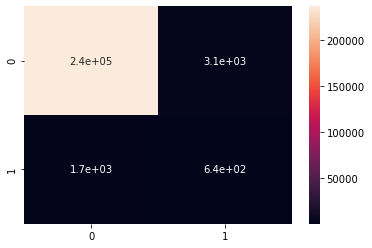

In [84]:
#confusion matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_target_df, pred_hr_rf)
cm
sns.heatmap(confusion_matrix(test_target_df,pred_hr_rf),annot = True)

In [90]:
def evaluate_model(model,X,y_true):
  th = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
  pred = model.predict_proba(X)[:,1]
  scores = []
  tpr = []
  fpr = []

  for i in th:
    pred_labels =[]
    for j in pred:
      if j>=i:
        pred_labels.append(1)
      else:
        pred_labels.append(0)
    scores.append([recall_score(y_true,pred_labels,pos_label=1),precision_score(y_true,pred_labels,pos_label=1)])

    pred_labels = np.array(pred_labels)

    fp = np.sum((pred_labels == 1) & (y_true == 0))
    tp = np.sum((pred_labels == 1) & (y_true == 1))
    fn = np.sum((pred_labels == 0) & (y_true == 1))
    tn = np.sum((pred_labels == 0) & (y_true == 0))
    
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))
  f1score = f1_score(y_true, model.predict(X),average = None)
  print("The F1 scores of each class and Macro F1 score are : " , f1score[0] ,f1score[1] , (f1score[0]+f1score[1])/2)

  xx = [X[0] for X in scores]
  yy = [Y[1] for Y in scores]
  fig = plt.figure(figsize=(6,8))

  ax1 = fig.add_subplot(311)
  ax1.plot(xx,yy,label = 'AUC PR curve'+str(np.round(auc(xx,yy),3)))

  ax1.set_title("Precision - Recall curve")
  ax1.set_xlabel("Recall")
  ax1.set_ylabel("Precision")
  ax1.legend()

  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

  ax2 = fig.add_subplot(312)
  ax2.plot(fpr,tpr,label = "Model ROC AUC on test data : "+str(np.round(auc(fpr,tpr),3)))
  ax2.plot([0, 1], ls="--",label='No Skill')
  ax2.set_title("ROC-AUC curve")
  ax2.set_xlabel("FPR")
  ax2.set_ylabel("TPR")
  ax2.legend()
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

The F1 scores of each class and Macro F1 score are :  0.9257613777942976 0.0759684689156722 0.5008649233549849


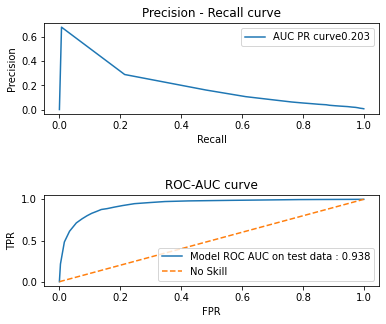

In [91]:
evaluate_model(model,test_df,test_target_df)